In [25]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz, simps, cumtrapz

In [26]:
data_1985 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/1985/0_12.csv', sep='\t', dtype=np.float, decimal=',')

In [27]:
data_1985.to_csv('../B(GT) peaks processing/recognition/Ga/plots/1985/0_12_new.csv', index=False)

In [28]:
data_2015_0_5 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/2015/0_5.csv', sep='\t', dtype=np.float, decimal=',')
data_2015_5_28 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/2015/5_28.csv', sep='\t', dtype=np.float, decimal=',')

In [29]:
data_2015 = data_2015_0_5.append(data_2015_5_28)
#data_2015.to_csv('../plots/2015/0_28.csv', index=False)

In [30]:
data_2015.head()

,x,y
0,-0.076034,4.284644
1,-0.074708,4.284644
2,-0.073382,4.284644
3,-0.072057,4.284644
4,-0.070731,4.284644


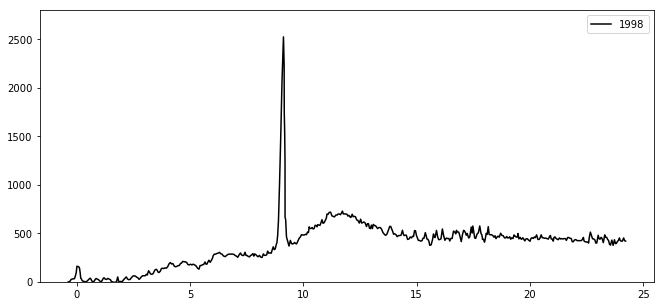

In [31]:
data_1998 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/1998/data.csv', sep='\t', dtype=np.float, decimal=',')
data_1998['x'] = -data_1998['x'] + 450 - 0.25

plt.figure(figsize=(11,5))
plt.plot(data_1998['x'].values, data_1998['y'].values, c='black', label='1998')
plt.ylim(0,2800)
#plt.xlim(-1,5)
plt.legend()
plt.show()

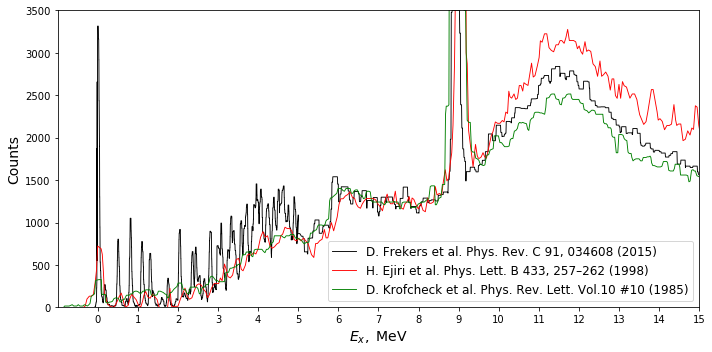

In [32]:
ref2015 = 'D. Frekers et al. Phys. Rev. C 91, 034608 (2015)'
ref1998 = 'H. Ejiri et al. Phys. Lett. B 433, 257–262 (1998)'
ref1985 = 'D. Krofcheck et al. Phys. Rev. Lett. Vol.10 #10 (1985)'

plt.figure(figsize=(10,5))
plt.plot(data_2015['x'].values, data_2015['y'].values, c='black', label=ref2015, ls='-', linewidth=0.9)
plt.plot(data_1998['x'].values, data_1998['y'].values*4.5, c='red', label=ref1998, ls='-', linewidth=0.9)
plt.plot(data_1985['X'].values, data_1985['Y'].values*1.9, c='g', label=ref1985, ls='-', linewidth=0.9)

plt.xlabel('$E_{x},$ MeV', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(np.arange(0, 31, step=1))

plt.legend(loc = 'lower right', fontsize=12)
plt.xlim(-1,15)
plt.ylim(0,3500)
plt.tight_layout()
#plt.savefig('ge_exp_comparison.png', format='png', dpi=500)
plt.show()

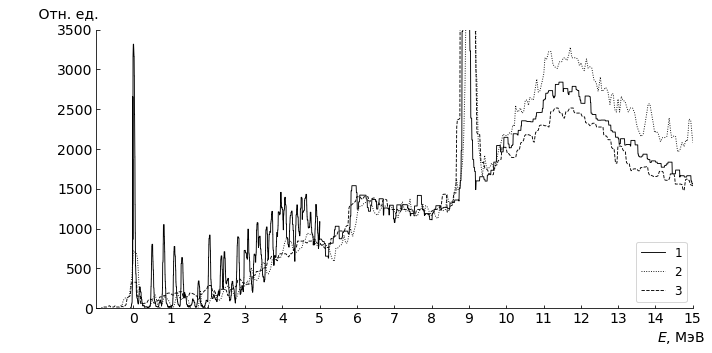

In [33]:
#ref2015 = 'D. Frekers et al. Phys. Rev. C 91, 034608 (2015)'
#ref1998 = 'H. Ejiri et al. Phys. Lett. B 433, 257–262 (1998)'
#ref1985 = 'D. Krofcheck et al. Phys. Rev. Lett. Vol.10 #10 (1985)'
ref2015 = '1'
ref1998 = '2'
ref1985 = '3'


f, ax = plt.subplots(figsize=(10,5))
ax.plot(data_2015['x'].values, data_2015['y'].values, c='black', label=ref2015, ls='-', linewidth=0.9)
ax.plot(data_1998['x'].values, data_1998['y'].values*4.5, ls=':', c='black', label=ref1998, linewidth=0.9)
ax.plot(data_1985['X'].values, data_1985['Y'].values*1.9, ls='--', c='black', label=ref1985, linewidth=0.9)

ax.tick_params(direction='in', labelsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('$E$, МэВ', x=0.98, y=1.2, fontsize=14)
ax.set_ylabel('       Отн. ед.', x=1, y=1.03, rotation=0, fontsize=14)
ax.set_xticks(np.arange(0, 31, step=1))

plt.legend(loc = 'lower right', fontsize=12)
plt.xlim(-1,15)
plt.ylim(0,3500)
plt.tight_layout()
#plt.savefig('ge_exp_comparison.png', format='png', dpi=500)
plt.show()

### B(GT) picture

In [34]:
BGT_2015 = pd.read_excel('../B(GT) peaks processing/recognition/Ga/bgt_table_values/2015.xls')
BGT_2015.head()

,E_right_borber,B(GT),B(GT)_indiv_states
0,0.0,0.000,0.000
1,0.5,0.088,0.106
2,1.0,0.029,0.024
3,1.5,0.034,0.035
4,2.0,0.012,0.009


In [35]:
BGT_2015['E_right_borber'].values

array([0.  , 0.5 , 1.  , 1.5 , 2.  , 2.5 , 3.  , 3.5 , 4.  , 4.5 , 5.  ,
       5.5 , 6.  , 6.5 , 7.  , 7.42, 8.46])

In [36]:
BGT_1998 = pd.read_excel('../B(GT) peaks processing/recognition/Ga/bgt_table_values/1998.xls', )
BGT_1998.head()

,E,B(GT),E_right_border,B(GT)_1
0,0.000,0.08910,7.42,2.88
1,0.175,0.00491,8.46,0.74
2,0.500,0.02080,0.00,0.00
3,0.830,0.02370,0.00,0.00
4,1.160,0.02330,0.00,0.00


In [37]:
BGT_1998['E'].values

array([0.   , 0.175, 0.5  , 0.83 , 1.16 , 1.36 , 7.42 , 8.46 ])

In [38]:
BGT_1985 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/bgt_table_values/1985.csv', sep='\t', dtype=np.float, decimal=',')
BGT_1985['d_B(GT)'] = BGT_1985['d_B(GT)']
BGT_1985.head()

,E,d_B(GT)
0,-0.327869,0.440544
1,-0.245902,2.613738
2,-0.218579,4.779059
3,-0.191257,10.546684
4,-0.109290,10.558495


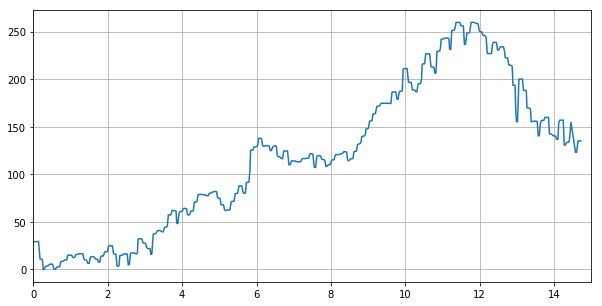

In [39]:
plt.figure(figsize=(10,5))
plt.plot(BGT_1985['E'].values, BGT_1985['d_B(GT)'].values)
plt.grid()
plt.xlim(0,15)
plt.show()

In [40]:
decomp2015 = pd.read_csv('71Ga_2PR.csv')
decomp2015.head()

,Unnamed: 0,x,y
0,0,0.000000,0.0
1,1,0.002062,0.0
2,2,0.004123,0.0
3,3,0.006185,0.0
4,4,0.008246,0.0


In [41]:
SE_71Ga = decomp2015['y'].values / trapz(decomp2015['y'].values, decomp2015['x'].values) * 27

q = 0.5
SE_71Ga06 = decomp2015['y'].values/trapz(decomp2015['y'].values, decomp2015['x'].values)*27*q

In [42]:
def border_func(x_data, y_data, border):
    a=np.where(x_data<border)
    #print(len(a[0]), len(x_data)-len(a[0]), len(x_data), a[0])
    return np.hstack(( y_data[a], np.zeros(len(x_data)-len(a[0])) ))

def get_bin_integral2(right_border, x_data, strenght_func):
    y_bordered = border_func(x_data, strenght_func, right_border)
    return trapz(y_bordered, x_data)

In [43]:
energy_bins_1985 = np.arange(0.5, 15.5, 0.5)
bgt_integ_1985=np.array([get_bin_integral2(elem, BGT_1985['E'].values, BGT_1985['d_B(GT)'].values/100) 
                         for elem in energy_bins_1985])
bgt_integ_1985

array([ 0.10464311,  0.14186123,  0.20531367,  0.27371628,  0.3551083 ,
        0.45662424,  0.6198451 ,  0.88877951,  1.21562317,  1.61973616,
        1.97498176,  2.44963652,  3.14216496,  3.70452521,  4.29687771,
        4.87341479,  5.461936  ,  6.11034363,  6.99483212,  7.87491182,
        8.88734404, 10.02767643, 11.26345099, 12.50795996, 13.67810466,
       14.77539353, 15.66004005, 16.43729767, 17.15447052, 17.41612694])

In [44]:
energy_bins_2015 = np.arange(0.5, 30.5, 0.5)
bgt_integ_2015=np.array([get_bin_integral2(elem, decomp2015['x'].values, SE_71Ga)
                         for elem in energy_bins_2015])
bgt_integ_2015_06=np.array([get_bin_integral2(elem, decomp2015['x'].values, SE_71Ga06)
                         for elem in energy_bins_2015])

bgt_integ_2015[-1], bgt_integ_2015_06[-1]

(26.998839169208196, 13.499419584604098)

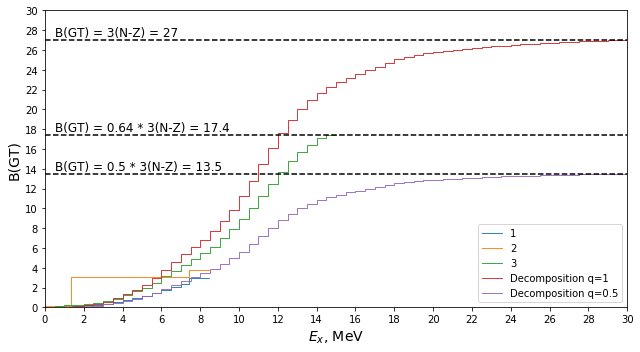

In [45]:
plt.figure(figsize=(9,5))
plt.step(BGT_2015['E_right_borber'].values, np.cumsum(BGT_2015['B(GT)'].values), 
         linewidth=0.9, label=ref2015)
plt.step(BGT_1998['E'].values, np.cumsum(BGT_1998['B(GT)'].values), linewidth=0.9,
        label=ref1998)
plt.step(energy_bins_1985, bgt_integ_1985, linewidth=0.9, label=ref1985)
plt.step(energy_bins_2015, bgt_integ_2015, linewidth=0.9, label='Decomposition q=1')
plt.step(energy_bins_2015, bgt_integ_2015_06, linewidth=0.9, label='Decomposition q=0.5')
plt.axhline(y=27, c='black', ls='--',)
plt.axhline(y=bgt_integ_1985[-1], c='black', ls='--',)
plt.axhline(y=bgt_integ_2015_06[-1], c='black', ls='--',)

plt.text(0.5, 27.4, 'B(GT) = 3(N-Z) = 27',  fontsize=12)
plt.text(0.5, 17.8, 'B(GT) = 0.64 * 3(N-Z) = 17.4',  fontsize=12)
plt.text(0.5, 13.9, 'B(GT) = 0.5 * 3(N-Z) = 13.5',  fontsize=12)


plt.xticks(np.arange(0, 31, step=2))
plt.yticks(np.arange(0, 31, step=2))
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel('$E_{x}$, MeV', fontsize=14)
plt.ylabel('B(GT)', fontsize=14)
plt.legend(loc = 'lower right')
plt.tight_layout()
#plt.savefig('BGT_sum.png', format='png', dpi=500)
plt.show()

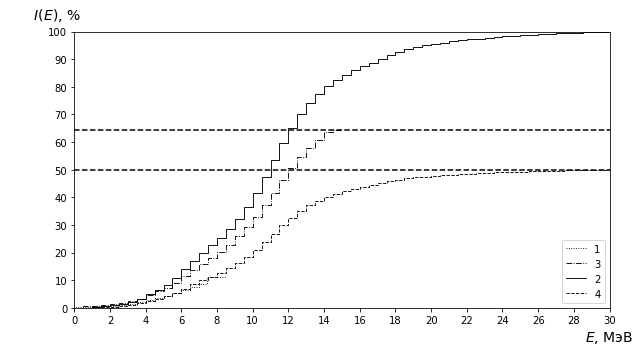

In [46]:
f, ax = plt.subplots(figsize=(9,5))
ax.step(BGT_2015['E_right_borber'].values, np.cumsum(BGT_2015['B(GT)'].values/27*100), 
         linestyle=':', color='black', linewidth=0.9, label=ref2015)
#plt.step(BGT_1998['E'].values, np.cumsum(BGT_1998['B(GT)'].values), linewidth=0.9,
#        label=ref1998)
ax.step(energy_bins_1985, bgt_integ_1985/27*100, linestyle='-.', color='black', linewidth=0.9, label=ref1985)
#ax.step(energy_bins_2015, bgt_integ_2015, linestyle='-', color='black', linewidth=0.9, label='Decomposition q=1')
#ax.step(energy_bins_2015, bgt_integ_2015_06, linestyle='--', color='black', linewidth=0.9, label='Decomposition q=0.5')
ax.step(energy_bins_2015, bgt_integ_2015/27*100, linestyle='-', color='black', linewidth=0.9, label='2')
ax.step(energy_bins_2015, bgt_integ_2015_06/27*100, linestyle='--', color='black', linewidth=0.9, label='4')
#ax.axhline(y=27, c='black', ls='--',)
ax.axhline(y=bgt_integ_1985[-1]/27*100, c='black', ls='--',)
ax.axhline(y=bgt_integ_2015_06[-1]/27*100, c='black', ls='--',)

#ax.text(0.5, 27.4, 'B(GT) = 3(N-Z) = 27',  fontsize=12)
#ax.text(0.5, 17.8, 'B(GT) = 0.64 * 3(N-Z) = 17.4',  fontsize=12)
#ax.text(0.5, 13.9, 'B(GT) = 0.5 * 3(N-Z) = 13.5',  fontsize=12)


ax.set_xticks(np.arange(0, 31, step=2))
ax.set_yticks(np.arange(0, 102, step=10))
ax.set_xlim(0,30)
ax.set_ylim(0,100)
ax.set_xlabel('$E$, МэВ', x=1, fontsize=14)
ax.set_ylabel('      $I(E)$, %', x=0.5, y=1.03, rotation=0, fontsize=14)
ax.legend(loc = 'lower right')
plt.tight_layout()
#plt.savefig('BGT_sum_IzvRAS.png', format='png', dpi=500)
plt.show()

In [47]:
theor_SE = pd.read_excel('71Ga_theorS(E).xls')
theor_SE.head()

,Ex,y
0,0.00,0.00000
1,0.01,0.09227
2,0.02,0.13784
3,0.03,0.22770
4,0.04,0.44600


In [48]:
bgt_integ_theorSE=np.array([get_bin_integral2(elem, theor_SE['Ex'].values, theor_SE['y'].values)
                         for elem in energy_bins_2015])

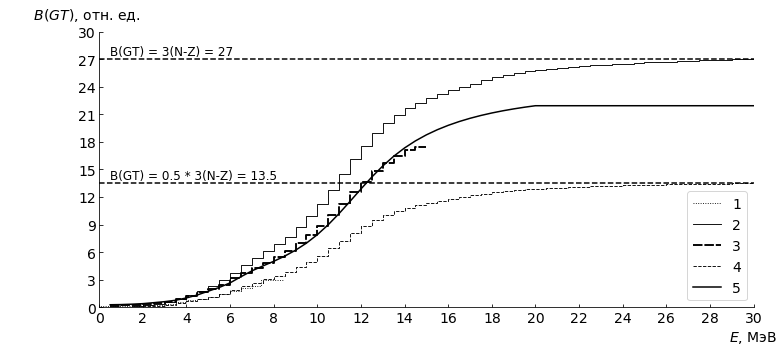

In [67]:
f, ax = plt.subplots(figsize=(11,5))
ax.step(BGT_2015['E_right_borber'].values, np.cumsum(BGT_2015['B(GT)'].values), 
         linestyle=':', color='black', linewidth=0.9, label=ref2015)
#plt.step(BGT_1998['E'].values, np.cumsum(BGT_1998['B(GT)'].values), linewidth=0.9,
#        label=ref1998)
ax.step(energy_bins_2015, bgt_integ_2015, linestyle='-', color='black', linewidth=0.9, label='2')
ax.step(energy_bins_1985, bgt_integ_1985, linestyle=':', dashes=(5,1),color='black', linewidth=1.9, label=ref1985)
#ax.step(energy_bins_2015, bgt_integ_2015, linestyle='-', color='black', linewidth=0.9, label='Decomposition q=1')
#ax.step(energy_bins_2015, bgt_integ_2015_06, linestyle='--', color='black', linewidth=0.9, label='Decomposition q=0.5')
ax.step(energy_bins_2015, bgt_integ_2015_06, linestyle='--', color='black', linewidth=0.9, label='4')
ax.plot(energy_bins_2015, bgt_integ_theorSE, linestyle='-', color='black', linewidth=1.5, label='5')

ax.axhline(y=27, c='black', ls='--',)
#ax.axhline(y=bgt_integ_1985[-1], c='black', ls='--',)
ax.axhline(y=bgt_integ_2015_06[-1], c='black', ls='--',)

ax.text(0.5, 27.4, 'B(GT) = 3(N-Z) = 27',  fontsize=12)
#ax.text(0.5, 17.8, 'B(GT) = 0.64 * 3(N-Z) = 17.4',  fontsize=12)
ax.text(0.5, 13.9, 'B(GT) = 0.5 * 3(N-Z) = 13.5',  fontsize=12)

ax.tick_params(direction='in', labelsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0, 31, step=2))
ax.set_yticks(np.arange(0, 31, step=3))
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.set_xlabel('$E$, МэВ', x=1, fontsize=14)
ax.set_ylabel('      $B(GT)$, отн. ед.', x=0.5, y=1.03, rotation=0, fontsize=14)
ax.legend(loc = 'lower right', fontsize=14)
plt.tight_layout()
plt.savefig('BGT_sum_IzvRAS.png', format='png', dpi=500)
plt.show()

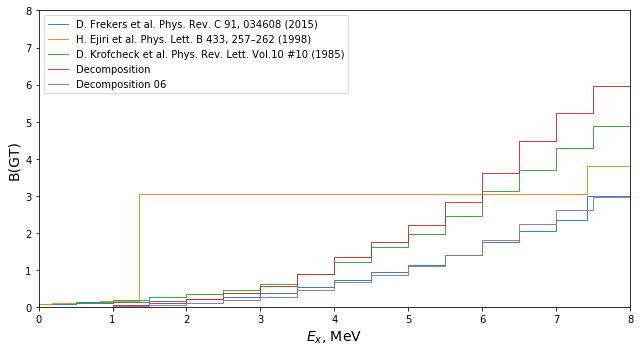

In [24]:
plt.figure(figsize=(9,5))
plt.step(BGT_2015['E_right_borber'].values, np.cumsum(BGT_2015['B(GT)'].values), 
         linewidth=0.9, label=ref2015)
plt.step(BGT_1998['E'].values, np.cumsum(BGT_1998['B(GT)'].values), linewidth=0.9,
        label=ref1998)
plt.step(energy_bins_1985, bgt_integ_1985, linewidth=0.9, label=ref1985)
plt.step(energy_bins_2015, bgt_integ_2015, linewidth=0.9, label='Decomposition')
plt.step(energy_bins_2015, bgt_integ_2015_06, linewidth=0.9, label='Decomposition 06')

plt.axhline(y=27, c='black', ls='--',)
plt.axhline(y=bgt_integ_1985[-1], c='black', ls='--',)

#plt.text(0.5, 27.4, 'B(GT) = 3(N-Z) = 27',  fontsize=12)
#plt.text(0.5, 17.8, 'B(GT) = 0.64 * 3(N-Z) = 17.4',  fontsize=12)


plt.xticks(np.arange(0, 31, step=1))
plt.yticks(np.arange(0, 31, step=1))
plt.xlim(0,8)
plt.ylim(0,8)
plt.xlabel('$E_{x}$, MeV', fontsize=14)
plt.ylabel('B(GT)', fontsize=14)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

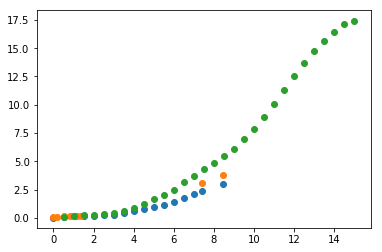

In [45]:
plt.scatter(BGT_2015['E_right_borber'].values, np.cumsum(BGT_2015['B(GT)'].values))
plt.scatter(BGT_1998['E'].values, np.cumsum(BGT_1998['B(GT)'].values))
plt.scatter(energy_bins_1985, bgt_integ_1985)
#plt.ylim(0,3.2)
#plt.xlim(0,9)
plt.show()